## MACHINE LEARNING

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm,metrics

In [2]:
data=pd.read_csv(r"C:/Users/User/Desktop/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

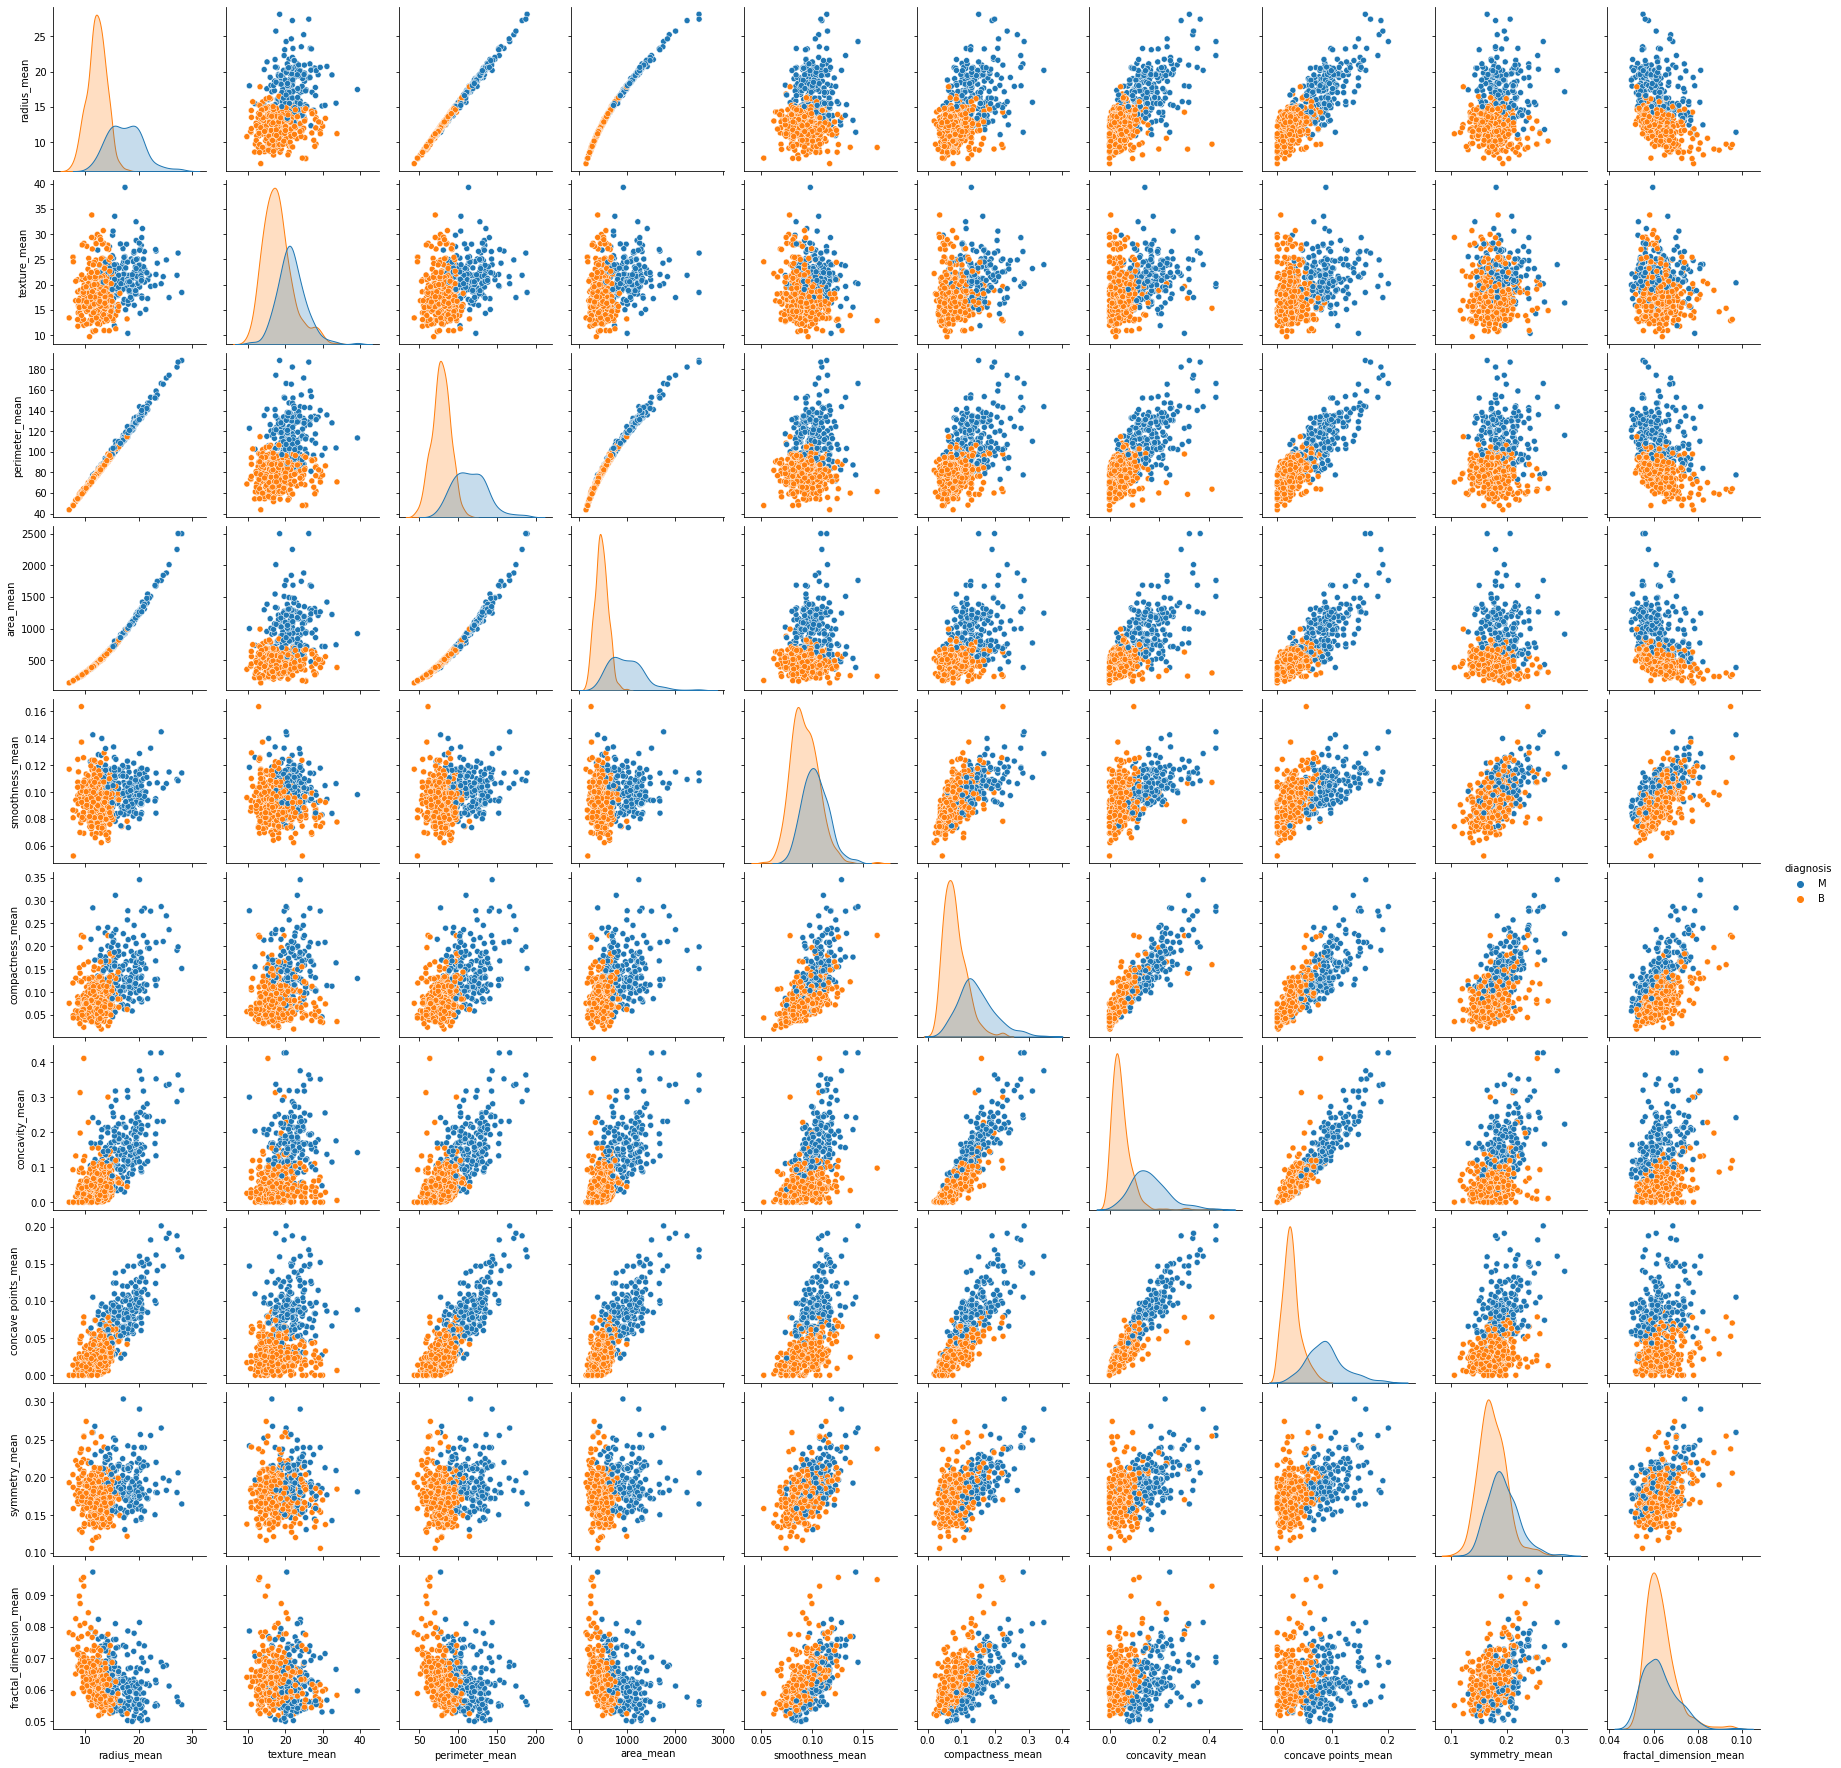

In [7]:
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

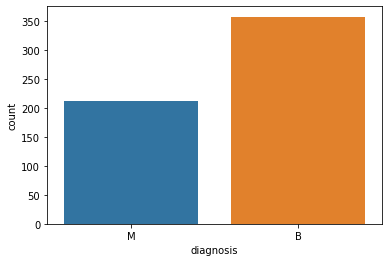

In [8]:
sns.countplot(data['diagnosis'], label = "Count")

<AxesSubplot:>

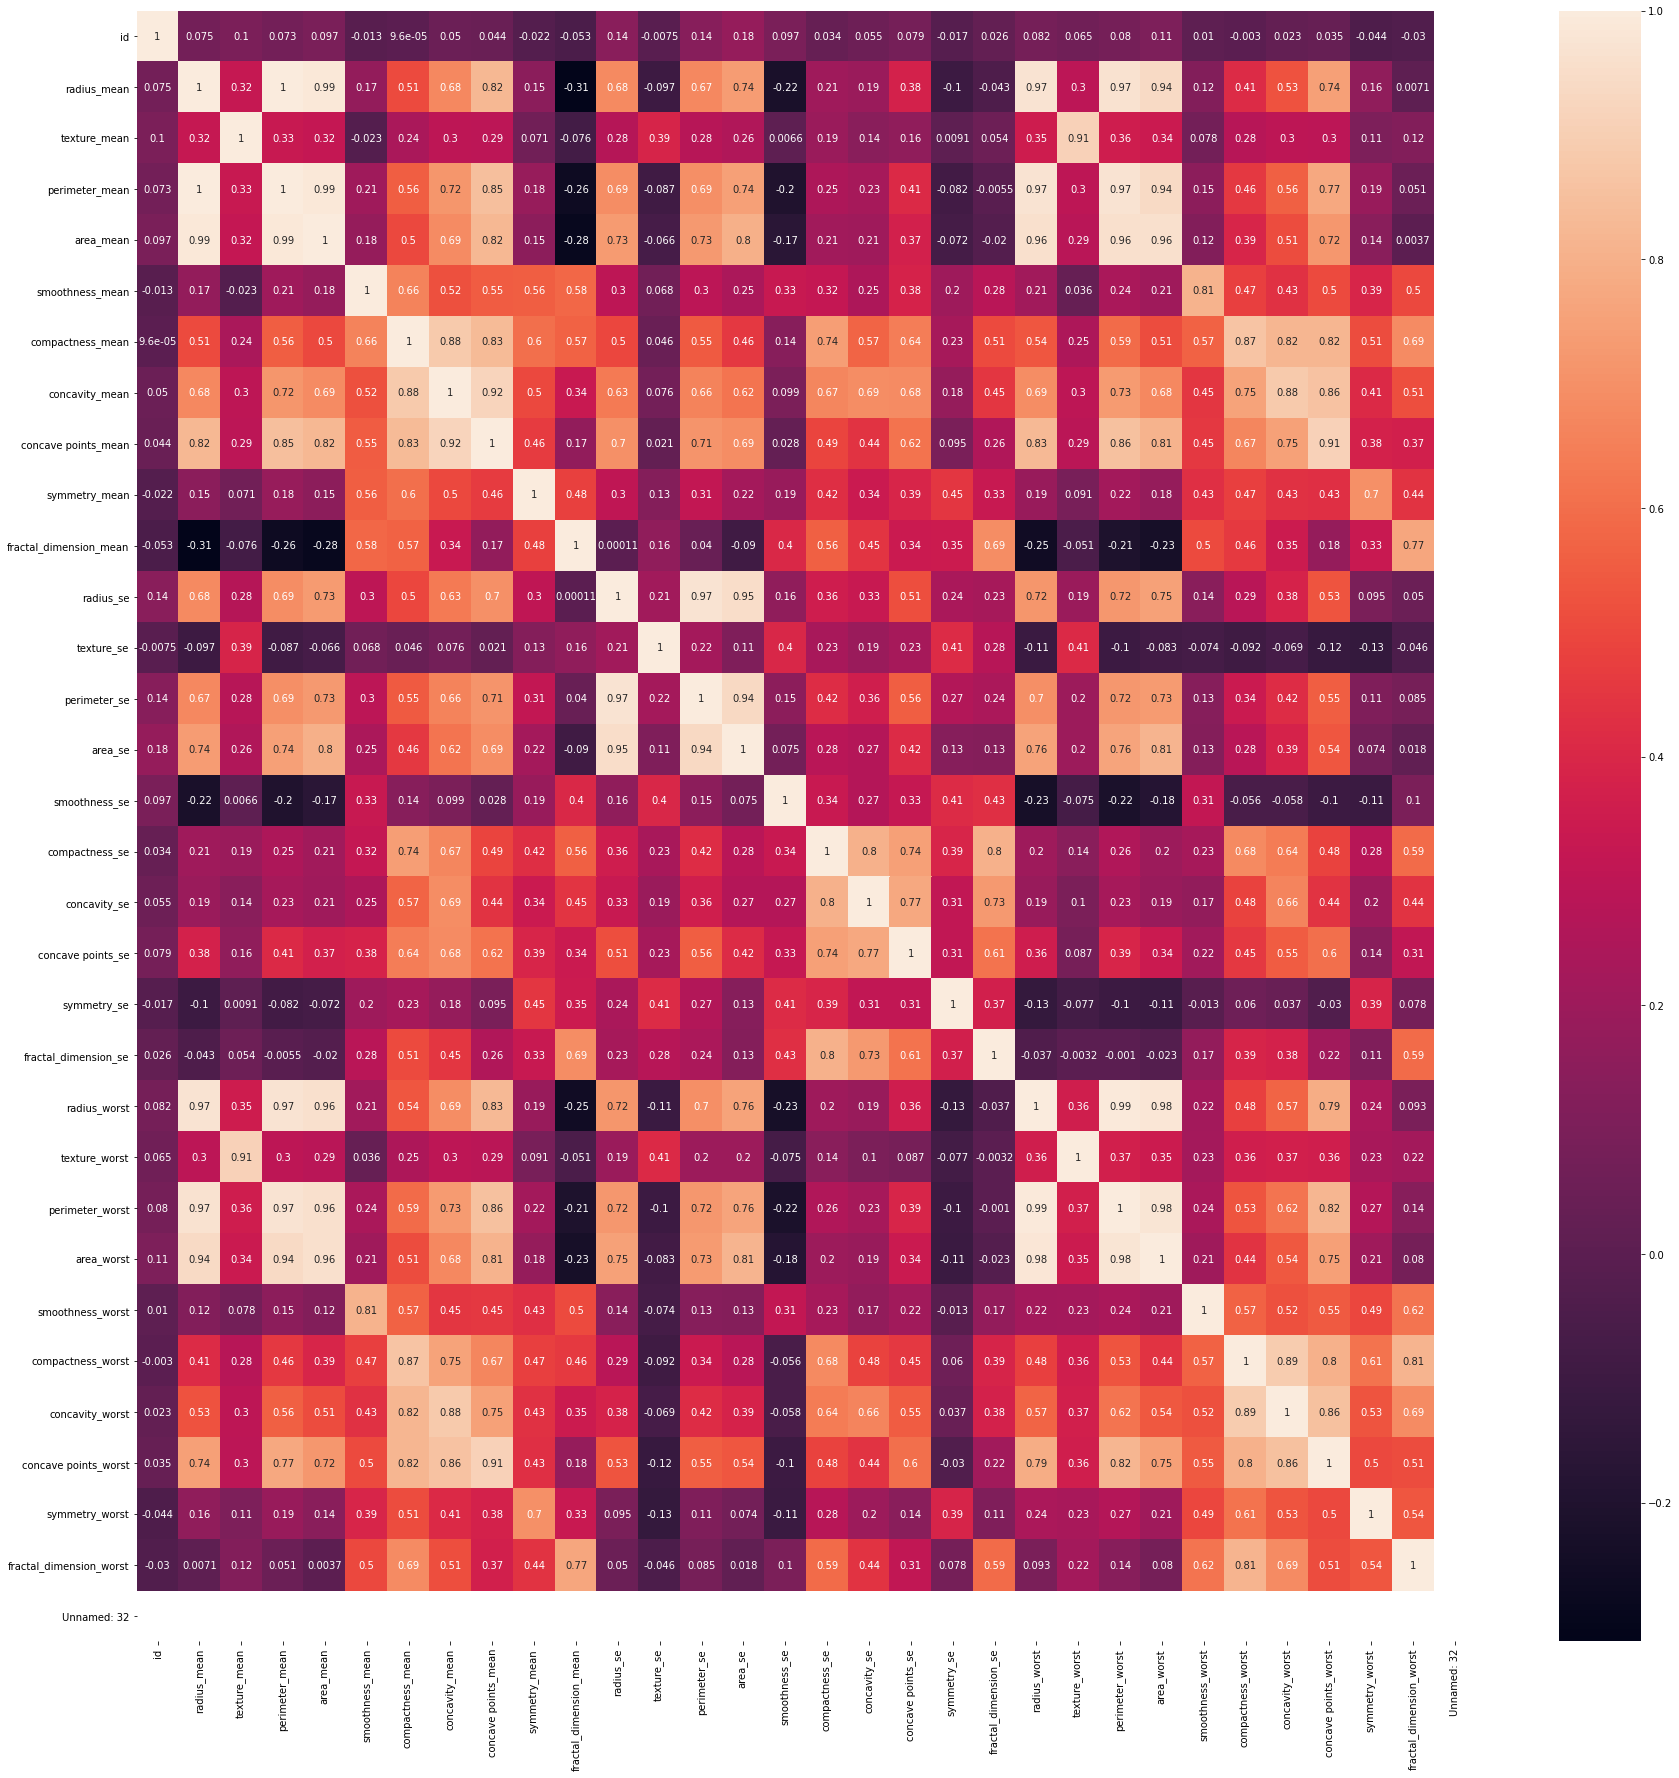

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True)

In [10]:
x=data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y=data[['diagnosis']]
y=pd.get_dummies(y, drop_first=True)

In [11]:
y.tail()

,diagnosis_M
564,1
565,1
566,1
567,1
568,0


<AxesSubplot:>

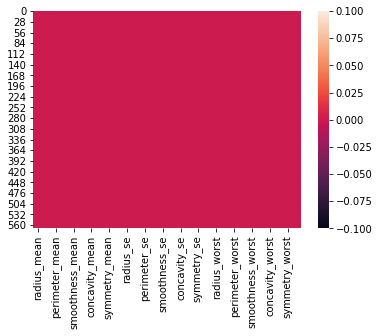

In [12]:
sns.heatmap(x.isnull())

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True)
y_train.tail()

,diagnosis_M
48,0
524,0
87,1
467,0
206,0


In [14]:
x_train.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,...,13.76,20.70,89.88,582.6,0.1494,0.2156,0.30500,0.06548,0.2747,0.08301
524,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.024160,0.1387,0.06891,...,11.24,22.99,74.32,376.5,0.1419,0.2243,0.08434,0.06528,0.2502,0.09209
87,19.020,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.082710,0.1953,0.05629,...,24.56,30.41,152.90,1623.0,0.1249,0.3206,0.57550,0.19560,0.3956,0.09288
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875
206,9.876,17.27,62.92,295.4,0.10890,0.07232,0.01756,0.019520,0.1934,0.06285,...,10.42,23.22,67.08,331.6,0.1415,0.1247,0.06213,0.05588,0.2989,0.07380


## linear svm

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confusion matrix:
[[99  1]
 [ 2 41]]


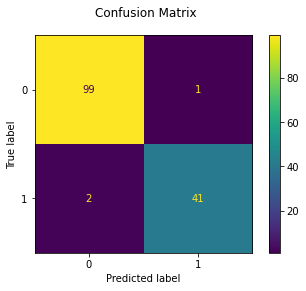

accuracy is  97.9020979020979


In [16]:
model1 = svm.SVC(kernel='linear')
model1.fit(x_train, y_train)
predicted = model1.predict(x_test)
disp = metrics.plot_confusion_matrix(model1, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
accuracy1=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])*100/x_test.shape[0]
plt.show()
print("accuracy is ",accuracy1)

## DecisionTreeClassifier

Confusion matrix:
[[93  7]
 [ 3 40]]


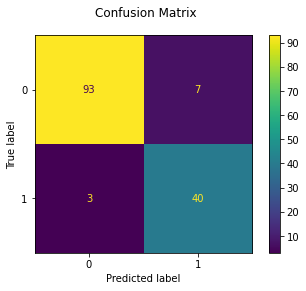

accuracy is  93.00699300699301


In [17]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model4.fit(x_train, y_train)
disp = metrics.plot_confusion_matrix(model4, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
accuracy4=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])*100/x_test.shape[0]
plt.show()
print("accuracy is ",accuracy4)

## RandomForestClassifier

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Confusion matrix:
[[97  3]
 [ 4 39]]


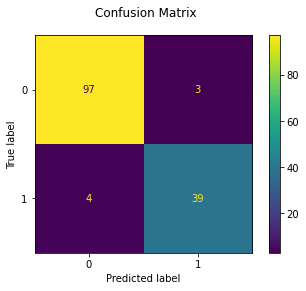

accuracy is  95.1048951048951


In [18]:
from sklearn.ensemble import RandomForestClassifier
model5= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model5.fit(x_train, y_train)
disp = metrics.plot_confusion_matrix(model5, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
accuracy5=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])*100/x_test.shape[0]
plt.show()
print("accuracy is ",accuracy5)


## DEEP LEARNING


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [30]:
model6=Sequential()
# Adding the input layer and the first hidden layer
model6.add(Dense(units=16, activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
model6.add(Dropout(rate=0.8))

In [31]:
model6.add(Dense(32, activation='relu'))
model6.add(Dropout(rate=0.5))
model6.add(Dense(16, activation='relu'))
model6.add(Dropout(rate=0.8))

In [32]:
model6.add(Dense(1, activation='sigmoid'))

In [33]:
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model6.fit(x,y, validation_split=0.3, epochs=100, batch_size=10)

Epoch 1/100
40/40 [==============================] - 0s 9ms/step - loss: 1.2235 - accuracy: 0.5628 - val_loss: 0.7180 - val_accuracy: 0.3626
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0129 - accuracy: 0.5603 - val_loss: 0.6786 - val_accuracy: 0.5614
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.9527 - accuracy: 0.5201 - val_loss: 0.6611 - val_accuracy: 0.7135
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8967 - accuracy: 0.5905 - val_loss: 0.6442 - val_accuracy: 0.8480
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8822 - accuracy: 0.5854 - val_loss: 0.6348 - val_accuracy: 0.9006
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8414 - accuracy: 0.5779 - val_loss: 0.6314 - val_accuracy: 0.9357
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8322 - accuracy: 0.6281 - val_loss: 0.6291 - val_accuracy: 0.9357
Epoch 8/100
4

In [35]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


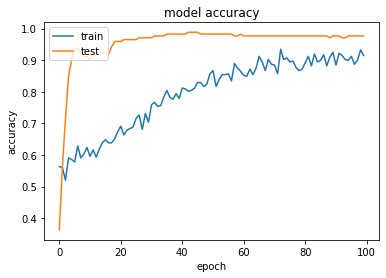

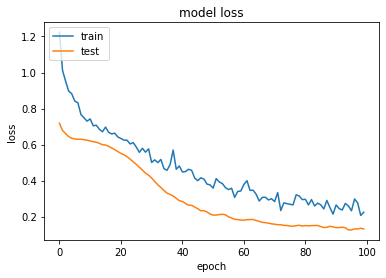

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()